In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PHI/ToF_ML/src

/content/drive/MyDrive/PHI/ToF_ML/src


In [4]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

## Feature Information

+ Passengerid 1-891 passenger id #
+ Survived: 0, 1 whether passenger survived or not
+ Pclass: 1, 2, 3 class of ticket
+ Name: string passenger name
+ Sex: string passenger sex
+ Age: float passenger age
+ SibSp: int # of siblings / spouses aboard
+ Parch: int # of parents / children aboard
+ Ticket: string ticekt number
+ Fare: float ticket price
+ Cabin: string cabin number
+ Embarked: char where passenger embarked, C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def get_binned_avg(df):
    '''
    Gets avg age of passengers based on class and sex.
    Return list of avg ages in order Male class 1-3,
    Female class 1-3.
    '''
    data = df.copy().drop('Cabin', axis=1)
    data.dropna(inplace=True)
    sums = [0 for x in range(6)]
    nums = [0 for x in range(6)]
    for row in data.itertuples():
        if row.Sex == 'male':
            i = row.Pclass - 1
        else:
            i = 2 + row.Pclass
            
        sums[i] += row.Age
        nums[i] += 1
    return [round(x / y) for x, y in zip(sums, nums)]

In [25]:
def get_new_age(df, avgs):
    '''
    Generates new age column replacing NaNs with the
    average for the class and sex of a passenger.
    '''
    new_age = []
    for row in df.itertuples():
        if np.isnan(row.Age):
            if row.Sex == 'male':
                i = row.Pclass - 1
            else:
                i = 2 + row.Pclass
            new_age.append(avgs[i])
        else:
            new_age.append(row.Age)
    return new_age

In [10]:
train['Age'] = get_new_age(train, get_binned_avg(train))
test['Age'] = get_new_age(test, get_binned_avg(test))

In [11]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [12]:
train['Relatives'] = train['SibSp'] + train['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 2160x720 with 0 Axes>

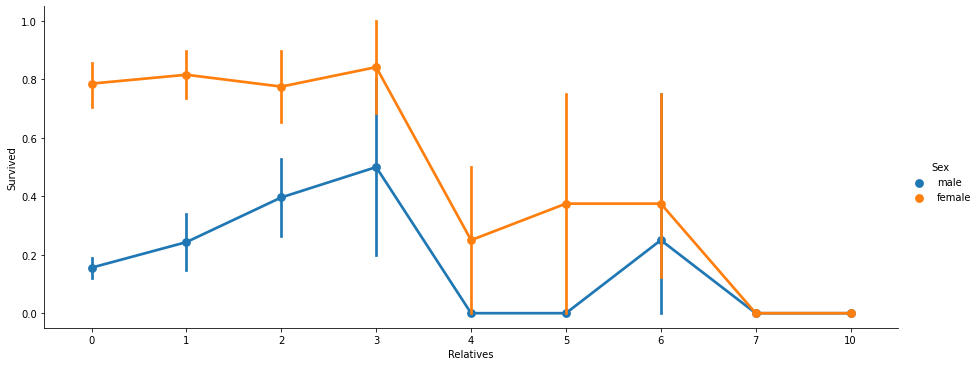

In [24]:
plt.figure(figsize=(30, 10))
sns.factorplot(x='Relatives',y='Survived', hue='Sex',
                      data=train, aspect = 2.5)

In [14]:
for dataset in [train, test]:
    dataset.loc[dataset['Relatives'] > 0, 'travelled_alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'travelled_alone'] = 1

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,travelled_alone
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1.0
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,0,1.0
417,1309,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,NaN,C,2,0.0


In [ ]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [ ]:
train['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
train = pd.concat([train, pd.get_dummies(train['Embarked'], drop_first=True)], axis=1)
test['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
test = pd.concat([test, pd.get_dummies(test['Embarked'], drop_first=True)], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    uint8  
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Embarked         891 non-null    object 
 11  Relatives        891 non-null    int64  
 12  travelled_alone  891 non-null    float64
 13  Q                891 non-null    uint8  
 14  S                891 non-null    uint8  
dtypes: float64(3), int64(6), object(3), uint8(3)
memory usage: 86.3+ KB


In [ ]:
train.columns = ['PassengerId', 'Survived', 'Class', 'Name', 'Sex', 'Age', 'SiblingSpouse',
       'ParentChild', 'Ticket', 'Fare', 'Embarked', 'Relatives', 'Traveled Alone',
       'Queenstown', 'SouthHampton']
test.columns = ['PassengerId', 'Class', 'Name', 'Sex', 'Age', 'SiblingSpouse',
'ParentChild', 'Ticket', 'Fare', 'Embarked', 'Relatives', 'Traveled Alone',
'Queenstown', 'SouthHampton']

In [ ]:
train.head()

,PassengerId,Survived,Class,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked,Relatives,Traveled Alone,Queenstown,SouthHampton
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1,0.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1,0.0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1.0,0,1


In [ ]:
test.tail()

,PassengerId,Class,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked,Relatives,Traveled Alone,Queenstown,SouthHampton
413,1305,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,S,0,1.0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,0,1.0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1.0,0,1
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,S,0,1.0,0,1
417,1309,3,"Peter, Master. Michael J",0,24.0,1,1,2668,22.3583,C,2,0.0,0,0


In [ ]:
train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [ ]:
train['AgeTimesClass'] = train['Age'] * train['Class']
test['AgeTimesClass'] = test['Age'] * test['Class']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Class           891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    uint8  
 5   Age             891 non-null    float64
 6   SiblingSpouse   891 non-null    int64  
 7   ParentChild     891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Relatives       891 non-null    int64  
 11  Traveled Alone  891 non-null    float64
 12  Queenstown      891 non-null    uint8  
 13  SouthHampton    891 non-null    uint8  
 14  AgeTimesClass   891 non-null    float64
dtypes: float64(4), int64(6), object(2), uint8(3)
memory usage: 86.3+ KB


In [ ]:
train['FarePerPerson'] = train['Fare'] /( train['Relatives'] + 1)
test['FarePerPerson'] = test['Fare'] /( test['Relatives'] + 1)

In [ ]:
test = test.fillna(np.mean(test['FarePerPerson']))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Class           418 non-null    int64  
 2   Name            418 non-null    object 
 3   Sex             418 non-null    uint8  
 4   Age             418 non-null    float64
 5   SiblingSpouse   418 non-null    int64  
 6   ParentChild     418 non-null    int64  
 7   Ticket          418 non-null    object 
 8   Fare            418 non-null    float64
 9   Relatives       418 non-null    int64  
 10  Traveled Alone  418 non-null    float64
 11  Queenstown      418 non-null    uint8  
 12  SouthHampton    418 non-null    uint8  
 13  AgeTimesClass   418 non-null    float64
 14  FarePerPerson   418 non-null    float64
dtypes: float64(5), int64(5), object(2), uint8(3)
memory usage: 40.5+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Class           891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    uint8  
 5   Age             891 non-null    float64
 6   SiblingSpouse   891 non-null    int64  
 7   ParentChild     891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Relatives       891 non-null    int64  
 11  Traveled Alone  891 non-null    float64
 12  Queenstown      891 non-null    uint8  
 13  SouthHampton    891 non-null    uint8  
 14  AgeTimesClass   891 non-null    float64
 15  FarePerPerson   891 non-null    float64
dtypes: float64(5), int64(6), object(2), uint8(3)
memory usage: 93.2+ KB


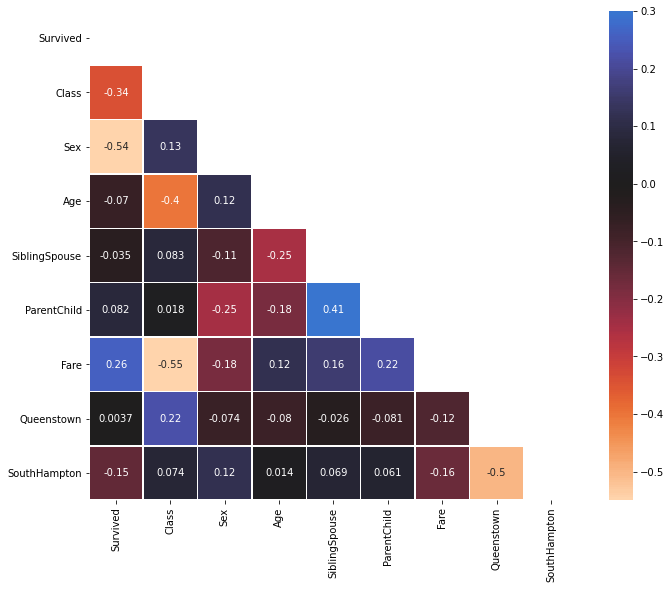

In [ ]:
corr = train.drop(['Ticket', 'Name', 'PassengerId', 'Traveled Alone', 'FarePerPerson', 'Relatives', 'AgeTimesClass'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap='icefire_r',mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


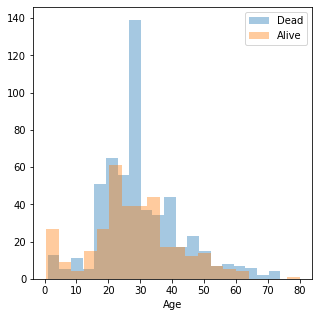

In [ ]:
plt.figure(figsize=(5, 5))
sns.distplot(train[train['Survived']==0]['Age'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Age'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

In [ ]:
train.drop(['Ticket', 'PassengerId', 'Name'], axis=1).head()

,Survived,Class,Sex,Age,SiblingSpouse,ParentChild,Fare,Relatives,Traveled Alone,Queenstown,SouthHampton,AgeTimesClass,FarePerPerson
0,0,3,1,22.0,1,0,7.2500,1,0.0,0,1,66.0,3.62500
1,1,1,0,38.0,1,0,71.2833,1,0.0,0,0,38.0,35.64165
2,1,3,0,26.0,0,0,7.9250,0,1.0,0,1,78.0,7.92500
3,1,1,0,35.0,1,0,53.1000,1,0.0,0,1,35.0,26.55000
4,0,3,1,35.0,0,0,8.0500,0,1.0,0,1,105.0,8.05000


In [ ]:
chances = pd.DataFrame(columns=['Class', 'Sex', 'Survival Chance'])
fares = [1, 2, 3]
below = [0, 1, 2]
i = 0
for num in range(3):
    for sex in range(2):
        chance = np.sum(train[(train['Class']<=fares[num] ) & (train['Class']>=below[num]) & (train['Sex'] == sex)]['Survived'])
        chance /= len(train[(train['Class']<=fares[num]) & (train['Class']>=below[num]) & (train['Sex'] == sex)])
        sex = 'male' if sex == 1 else 'female'
        chances.loc[i] = ['under ' + str(fares[num]), sex, chance]
        i += 1

In [ ]:
chances

,Class,Sex,Survival Chance
0,under 1,female,0.968085
1,under 1,male,0.368852
2,under 2,female,0.947059
3,under 2,male,0.269565
4,under 3,female,0.645455
5,under 3,male,0.140659


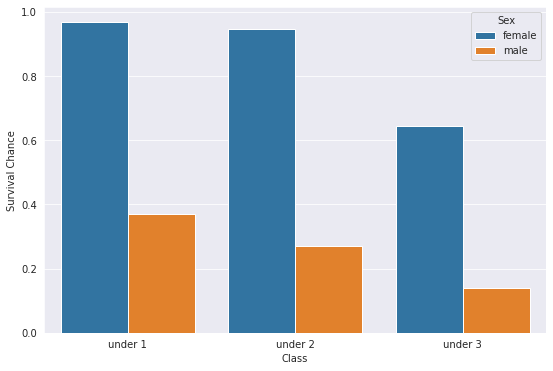

In [ ]:
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.barplot(data=chances, y='Survival Chance', x='Class', hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


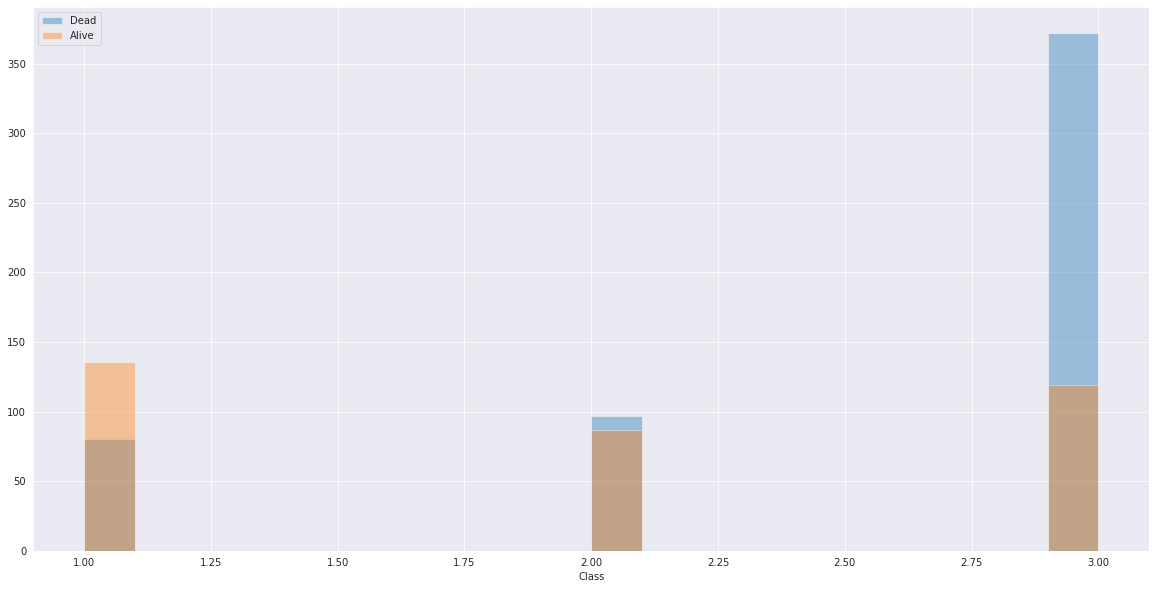

In [ ]:
plt.figure(figsize=(20, 10))
sns.distplot(train[train['Survived']==0]['Class'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Class'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


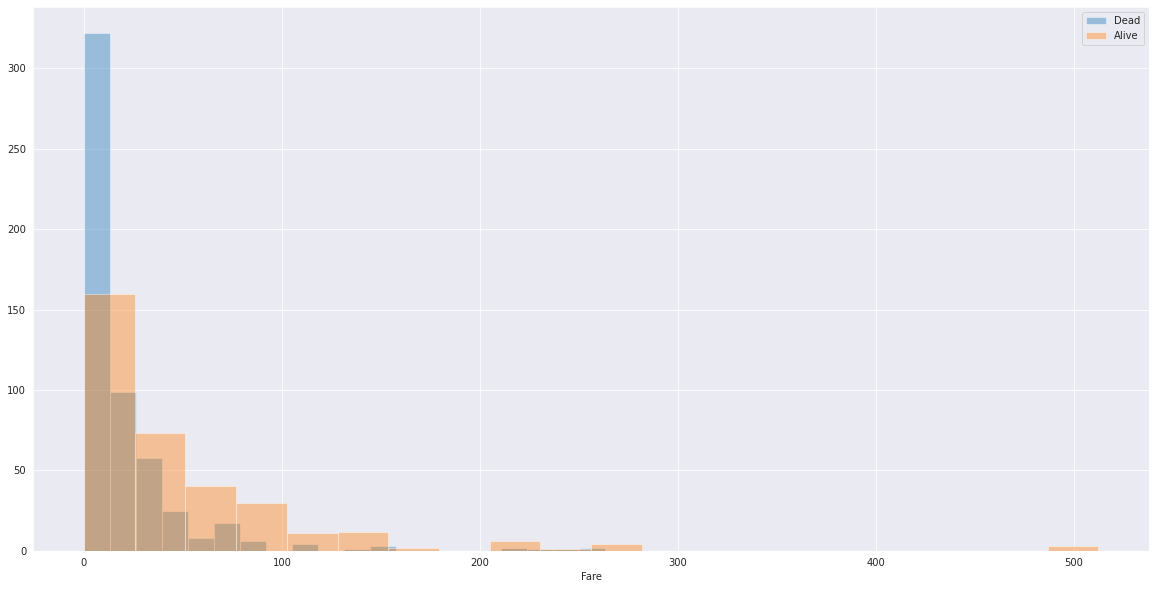

In [ ]:
plt.figure(figsize=(20, 10))
sns.distplot(train[train['Survived']==0]['Fare'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Fare'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
training_data = train[['Age', 'Fare', 'Sex', 'Queenstown', 'SouthHampton', 'SiblingSpouse', 'ParentChild', 'Class']]
X = training_data
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

lr = LogisticRegression(max_iter=500, solver='lbfgs')
lda = LinearDiscriminantAnalysis()
rfc = RandomForestClassifier(n_estimators=100)
models = [lr, lda, rfc]
for model in models:
    model.fit(X_train, y_train)
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test) 

In [ ]:
X.head()

,Age,Fare,Sex,Queenstown,SouthHampton,SiblingSpouse,ParentChild,Class
0,22.0,7.2500,1,0,1,1,0,3
1,38.0,71.2833,0,0,0,1,0,1
2,26.0,7.9250,0,0,1,0,0,3
3,35.0,53.1000,0,0,1,1,0,1
4,35.0,8.0500,1,0,1,0,0,3


In [ ]:
# Logistic Regression
lr.score(X_test, y_test) * 100

77.6536312849162

In [ ]:
# Linear Discriminant Analysis
lda.score(X_test, y_test) * 100

79.88826815642457

In [ ]:
# Stochastic Gradient Descent
sgd.score(X_test, y_test)* 100

60.33519553072626

In [ ]:
# K Nearest-Neighbors
knn.score(X_test, y_test)* 100

69.27374301675978

In [ ]:
# Decision Tree
decision_tree.score(X_test, y_test)* 100

77.09497206703911

In [ ]:
# Random Forest Classifier
rfc.score(X_test, y_test) * 100

82.12290502793296

In [ ]:
def bin_col(age, bins=[10, 20, 30, 45, 65]):
    for i, num in enumerate(bins):
        if age < num:
            return i
    return len(bins)

In [ ]:
train['Age'] = train['Age'].apply(bin_col)
test['Age'] = test['Age'].apply(bin_col)

In [ ]:
train['Fare'] = train['Fare'].apply(bin_col, args=([8, 15, 30, 100],))
test['Fare'] = test['Fare'].apply(bin_col, args=([8, 15, 30, 100],))

In [ ]:
def bin_title(title):
    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    title = title.split('.')[0].split()[-1]
    if  title in titles.keys():
        return titles[title]
    else:
        return 5

In [ ]:
train['Name'] = train['Name'].apply(bin_title)
test['Name'] = test['Name'].apply(bin_title)

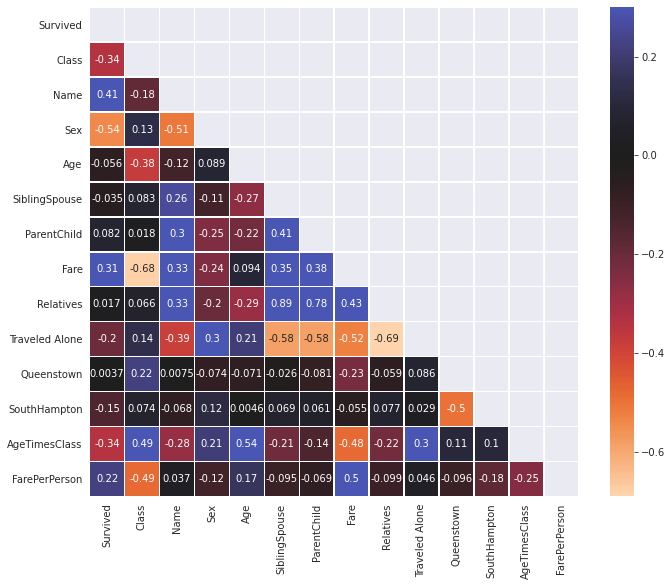

In [ ]:
corr = train.drop(['Ticket', 'PassengerId'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap='icefire_r',mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
training_data = train.drop(['Ticket', 'PassengerId'], axis=1)
ss_scaler = StandardScaler()
training_data = pd.DataFrame(data = training_data)
train_numerical_features = ['Age', 'Fare', 'AgeTimesClass', 'FarePerPerson']
training_data[train_numerical_features] = ss_scaler.fit_transform(training_data[train_numerical_features])
X = training_data.drop('Survived', axis=1)
y = training_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(max_iter=500, solver='lbfgs')
lda = LinearDiscriminantAnalysis()
rfc = RandomForestClassifier(n_estimators=100)
models = [lr, lda, rfc]
for model in models:
    model.fit(X_train, y_train)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test) 

In [ ]:
X.tail()

,Class,Name,Sex,Age,SiblingSpouse,ParentChild,Fare,Relatives,Traveled Alone,Queenstown,SouthHampton,AgeTimesClass,FarePerPerson
886,2,5,1,-0.279743,0,0,-0.435938,0,1.0,0,1,-0.295711,-0.193081
887,1,2,0,-1.206327,0,0,1.162501,0,1.0,0,1,-1.401854,0.281499
888,3,2,0,-0.279743,1,2,0.363281,3,0.0,0,1,0.083538,-0.392335
889,1,1,1,-0.279743,0,0,1.162501,0,1.0,0,0,-1.180626,0.281499
890,3,1,1,0.646841,0,0,-1.235157,0,1.0,1,0,1.031661,-0.339642


In [ ]:
# Logistic Regression
lr.score(X_test, y_test) * 100

79.88826815642457

In [ ]:
# Linear Discriminant Analysis
lda.score(X_test, y_test) * 100

78.2122905027933

In [ ]:
# Stocahsitc Gradient Descent
sgd.score(X_test, y_test)* 100

74.30167597765363

In [ ]:
# K Nearest-Neighbors
knn.score(X_test, y_test)* 100

78.77094972067039

In [ ]:
# Decision Tree
decision_tree.score(X_test, y_test)* 100

79.88826815642457

In [ ]:
# Random Forest
rfc.score(X_test, y_test)* 100

81.00558659217877

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
parameters = {'criterion':('gini', 'entropy'), 'n_estimators':[75, 150], 'max_depth':[3, 31]}
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7988826815642458

In [ ]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min

In [ ]:
from lightgbm import LGBMClassifier 
lgbm = LGBMClassifier(boosting_type ='dart')
parameters = {'num_leaves':[3,31], 'max_depth':[-1, 10], 'learning_rate':[0.001, 0.5], 'n_estimators':[75, 150]}
clf = GridSearchCV(lgbm, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8268156424581006

In [ ]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 'estimator__boosting_type': 'dart',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator

In [ ]:
lgbm = LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

0.8268156424581006

In [ ]:
rfc_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

In [ ]:
rfc_final.fit(X_train, y_train)
rfc_final.score(X_test, y_test)

0.8212290502793296

In [ ]:
rfc_final.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Relatives,travelled_alone,Q,S,AgeTimesClass,FarePerPerson
0,892,3,1,1,3,0,0,330911,0,0,1.0,1,0,103.5,7.829200
1,893,3,3,0,4,1,0,363272,0,1,0.0,0,1,141.0,3.500000
2,894,2,1,0,4,0,0,240276,0,0,1.0,1,0,124.0,9.687500
3,895,3,1,0,2,0,0,315154,0,0,1.0,0,1,81.0,8.662500
4,896,3,3,1,2,1,1,3101298,0,2,0.0,0,1,66.0,4.095833


In [ ]:
from sklearn.model_selection import train_test_split
testing_data = test.drop(['Ticket', 'Deck', 'PassengerId', 'Name'], axis=1)
ss_scaler = StandardScaler()
testing_data = pd.DataFrame(data = testing_data)
train_numerical_features = ['Age', 'Fare', 'AgeTimesClass', 'FarePerPerson']
testing_data[train_numerical_features] = ss_scaler.fit_transform(testing_data[train_numerical_features])
test_X = testing_data

KeyError: ignored

In [ ]:
X

In [ ]:
pd.Series(rfc.predict(test_X))

In [ ]:
df = pd.concat([test['PassengerId'], pd.Series(lr.predict(test_X))], axis=1)
df.columns = ['PassengerId', 'Survived']

In [ ]:
lr.fit(X, y)

In [ ]:
df.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,1
